In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import datetime as dt
from datetime import timedelta
import json
import os
import csv
import matplotlib.pyplot as plt


In [2]:
localdir=os.getcwd()
# localdir

In [3]:
folder=[folder for folder in os.listdir(localdir) if 'experiments data' in folder][0]
print(folder, os.listdir(folder), len(os.listdir(folder)))

experiments data ['A1_barterGame.json', 'A1_ChatIncludeWhisper.log', 'A2_barterGame.json', 'A2_ChatIncludeWhisper.log', 'A3_barterGame.json', 'A3_ChatIncludeWhisper.log', 'A4_barterGame.json', 'A4_ChatIncludeWhisper.log', 'A5_barterGame.json', 'A5_ChatIncludeWhisper.log', 'A6_barterGame.json', 'A6_ChatIncludeWhisper.log', 'A7_barterGame.txt', 'A7_ChatIncludeWhisper.log', 'B1_barterGame.json', 'B1_ChatIncludeWhisper.log', 'B2_barterGame.json', 'B2_ChatIncludeWhisper.log', 'B3_barterGame.json', 'B3_ChatIncludeWhisper.log', 'B4_barterGame.json', 'B4_ChatIncludeWhisper.log', 'B5_barterGame.json', 'B5_ChatIncludeWhisper.log', 'B6_barterGame.json', 'B6_ChatIncludeWhisper.log', 'C1_barterGame.json', 'C1_ChatIncludeWhisper.log', 'C2_barterGame.json', 'C2_ChatIncludeWhisper.log', 'C3_barterGame.json', 'C3_ChatIncludeWhisper.log', 'C4_barterGame.json', 'C4_ChatIncludeWhisper.log', 'C5_barterGame.json', 'C5_ChatIncludeWhisper.log', 'C6_barterGame.json', 'C6_ChatIncludeWhisper.log', 'C7_barterGame

In [4]:
json_files = [filename for filename in os.listdir(folder) if '.json' in filename or '.txt' in filename]
json_files, len(json_files)

(['A1_barterGame.json',
  'A2_barterGame.json',
  'A3_barterGame.json',
  'A4_barterGame.json',
  'A5_barterGame.json',
  'A6_barterGame.json',
  'A7_barterGame.txt',
  'B1_barterGame.json',
  'B2_barterGame.json',
  'B3_barterGame.json',
  'B4_barterGame.json',
  'B5_barterGame.json',
  'B6_barterGame.json',
  'C1_barterGame.json',
  'C2_barterGame.json',
  'C3_barterGame.json',
  'C4_barterGame.json',
  'C5_barterGame.json',
  'C6_barterGame.json',
  'C7_barterGame.txt'],
 20)

In [5]:
# player_names_list = ['Alan', 'Kalyani', 'Lamar', 'Sarah', 'Sokka']

In [6]:
# player_profession_dict = {}

# for ent in data_load['participants']:
#     player_profession_dict[ent['name']] = ent['profession'] 
# player_profession_dict

In [7]:
ACCEPTED = 'ACCEPTED'
DECLINED = 'DECLINED'
CANCELLED = 'CANCELLED'

game_trades_df_dict = {}
game_final_df_dict = {}
game_list = []
gametype_list = []
winner_list = []
score_list = []

player_profession_dict = {}

for filename in json_files:
    print(filename)
    gamename = filename.split('_barterGame')[0]
    data=open(os.path.join(localdir,folder,filename), encoding='utf8')
    data_load=json.load(data)
    data_load=data_load['barterGames'][0]

    player_profession_dict[filename] = {}
    for ent in data_load['participants']:
        player_profession_dict[filename][ent['name']] = ent['profession'] 

    trades_df=df.from_records(data_load["trades"])
    for ind in trades_df.index:
        trades_df.loc[ind,"beginTimestamp"]=pd.Timestamp(trades_df.loc[ind,"beginTimestamp"])
        trades_df.loc[ind,"endTimestamp"]=pd.Timestamp(trades_df.loc[ind,"endTimestamp"])
    print(trades_df.shape, filename)
    # trades_df = trades_df[trades_df['status'].isin([ACCEPTED, CANCELLED, DECLINED])]
    trades_df = trades_df[trades_df['status']==ACCEPTED]

    print(trades_df.shape, filename)
    game_trades_df_dict[filename] = trades_df
    # final_df=df.from_records(data_load['participants'])
    # game_final_df_dict[filename] = final_df
    # winner_list.append(data_load['winner'])
    # game_list.append(filename.split('_')[1])
    # if 'A' in filename.split('_')[1]:
    #     gametype_list.append('Competitive')
    # elif 'B' in filename.split('_')[1]:
    #     gametype_list.append('Baseline')
    # else:
    #     gametype_list.append('Cooperative')
    # score_list.append(data_load['score'])

# winner_df = df({'game':game_list, 'gametype':gametype_list, 'winner':winner_list,'score':score_list})
professions_set = set([player_profession_dict[folder][player] for folder in player_profession_dict for player in player_profession_dict[folder]])

A1_barterGame.json
(102, 9) A1_barterGame.json
(33, 9) A1_barterGame.json
A2_barterGame.json
(63, 11) A2_barterGame.json
(20, 11) A2_barterGame.json
A3_barterGame.json
(118, 11) A3_barterGame.json
(23, 11) A3_barterGame.json
A4_barterGame.json
(65, 11) A4_barterGame.json
(21, 11) A4_barterGame.json
A5_barterGame.json
(53, 13) A5_barterGame.json
(38, 13) A5_barterGame.json
A6_barterGame.json
(89, 13) A6_barterGame.json
(55, 13) A6_barterGame.json
A7_barterGame.txt
(54, 13) A7_barterGame.txt
(25, 13) A7_barterGame.txt
B1_barterGame.json
(66, 9) B1_barterGame.json
(27, 9) B1_barterGame.json
B2_barterGame.json
(88, 11) B2_barterGame.json
(17, 11) B2_barterGame.json
B3_barterGame.json
(71, 11) B3_barterGame.json
(34, 11) B3_barterGame.json
B4_barterGame.json
(46, 11) B4_barterGame.json
(21, 11) B4_barterGame.json
B5_barterGame.json
(113, 13) B5_barterGame.json
(30, 13) B5_barterGame.json
B6_barterGame.json
(99, 13) B6_barterGame.json
(59, 13) B6_barterGame.json
C1_barterGame.json
(42, 11) C

In [8]:
# def get_begin_end_scores(r):
#     endscore_dict = r['endScores']
#     beginscore_dict = r['beginScores']
#     requester_beginscore = beginscore_dict['requester']
#     requester_endscore = endscore_dict['requester']
#     requested_beginscore = beginscore_dict['requested']
#     requested_endscore = endscore_dict['requested']
#     requester_scoregain = requester_endscore - requester_beginscore
#     requested_scoregain = requested_endscore - requested_beginscore
#     total_scoregain = requester_scoregain + requested_scoregain
#     print(requester_scoregain, requested_scoregain, total_scoregain)
#     r['scoregain'] = total_scoregain
#     return r

# player_trades_df = game_trades_df_dict[filename]
# player_trades_df = player_trades_df[player_trades_df['status']==ACCEPTED]
# player_trades_df = player_trades_df.apply(get_begin_end_scores, axis=1)
# player_trades_df

In [9]:
'RED_GLAZED_TERRACOTTA'.lower().replace('_',' ')

'red glazed terracotta'

In [10]:
tierItemsValueFile=open('TierITemValues.txt', encoding='utf8')
tierItemsValuelines = tierItemsValueFile.readlines()
tierItemsValueFile.close()

item_names_list = []
item_tier_list = []
item_value_list = []
itemTierValue_dict = {}
profession_items_dict = {profession: [] for profession in professions_set}

for line in tierItemsValuelines:
    # print(line)
    if 'tier1' in line:
        item_name = line.split('ItemStack(Material.')[1].split('));')[0]
        item_name = item_name.lower()
        # item_names_list.append(item_name)
        # item_tier_list.append(1)
        # item_value_list.append(1)
        # print(line)
        profession_name = line.split('tier1')[1].split('.add(')[0]
        profession_items_dict[profession_name].append(item_name)
        if item_name not in itemTierValue_dict:
            itemTierValue_dict[item_name] = {'tier': 1, 'value':1}
    elif 'tier2' in line:
        item_name = line.split('ItemStack(Material.')[1].split('));')[0]
        item_name = item_name.lower()
        # item_names_list.append(item_name)
        # item_tier_list.append(2)
        # item_value_list.append(3)
        # print(line)
        profession_name = line.split('tier2')[1].split('.add(')[0]
        profession_items_dict[profession_name].append(item_name)
        if item_name not in itemTierValue_dict:
            itemTierValue_dict[item_name] = {'tier': 2, 'value':3}
    elif 'tier3' in line:
        item_name = line.split('ItemStack(Material.')[1].split('));')[0]
        item_name = item_name.lower()
        # item_names_list.append(item_name)
        # item_tier_list.append(3)
        # item_value_list.append(10)
        # print(line)
        profession_name = line.split('tier3')[1].split('.add(')[0]
        profession_items_dict[profession_name].append(item_name)
        if item_name not in itemTierValue_dict:
            itemTierValue_dict[item_name] = {'tier': 3, 'value':10}

# itemTierValue_df = df({'item_name':item_names_list, 'tier':item_tier_list, 'value':item_value_list})
print(itemTierValue_dict)
print(profession_items_dict)

{'potato': {'tier': 1, 'value': 1}, 'carrot': {'tier': 1, 'value': 1}, 'wheat': {'tier': 1, 'value': 1}, 'bread': {'tier': 2, 'value': 3}, 'pumpkin': {'tier': 2, 'value': 3}, 'mushroom_stew': {'tier': 3, 'value': 10}, 'cod': {'tier': 1, 'value': 1}, 'salmon': {'tier': 1, 'value': 1}, 'tropical_fish': {'tier': 1, 'value': 1}, 'pufferfish': {'tier': 2, 'value': 3}, 'turtle_egg': {'tier': 2, 'value': 3}, 'oak_boat': {'tier': 3, 'value': 10}, 'beef': {'tier': 1, 'value': 1}, 'chicken': {'tier': 1, 'value': 1}, 'porkchop': {'tier': 1, 'value': 1}, 'cooked_beef': {'tier': 2, 'value': 3}, 'cooked_porkchop': {'tier': 2, 'value': 3}, 'rabbit_stew': {'tier': 3, 'value': 10}, 'iron_ingot': {'tier': 1, 'value': 1}, 'gold_ingot': {'tier': 1, 'value': 1}, 'coal': {'tier': 1, 'value': 1}, 'fletching_table': {'tier': 2, 'value': 3}, 'smithing_table': {'tier': 2, 'value': 3}, 'diamond_sword': {'tier': 3, 'value': 10}, 'leather': {'tier': 1, 'value': 1}, 'stick': {'tier': 1, 'value': 1}, 'lead': {'tier'

In [11]:
TIER1_VALUE = 1
TIER2_VALUE = 3
TIER3_VALUE = 10

tier_items=pd.read_excel('exp.xlsx')
# print(tier_items)
tier3_items_set=set(list(tier_items["Tier 3"][tier_items["Tier 3"].notnull()].values))
tier2_items_set=set(list(tier_items["Tier 2"][tier_items["Tier 2"].notnull()].values))
tier1_items_set=set(list(tier_items["Tier 1"][tier_items["Tier 1"].notnull()].values))
# print('tier3 items: ', tier3_items_set, len(tier3_items_set))
# print('tier2 items: ', tier2_items_set, len(tier2_items_set))
# print('tier1 items: ', tier1_items_set, len(tier1_items_set))
tier1_items_list = [item.lower().replace(' ', '_') for item in tier1_items_set]
tier2_items_list = [item.lower().replace(' ', '_') for item in tier2_items_set]
tier3_items_list = [item.lower().replace(' ', '_') for item in tier3_items_set]
print('tier3 items: ', tier3_items_list, len(tier3_items_list))
print('tier2 items: ', tier2_items_list, len(tier2_items_list))
print('tier1 items: ', tier1_items_list, len(tier1_items_list))


tier3 items:  ['sheep_spawn_egg', 'cow_spawn_egg', 'oak_boat', 'mushroom_stew', 'diamond_axe', 'rabbit_stew', 'shears', 'chiseled_quartz_block', 'diamond_sword'] 9
tier2 items:  ['bread', 'cooked_porkchop', 'cooked_beef', 'red_glazed_terracotta', 'smithing_table', 'pufferfish', 'blue_glazed_terracotta', 'loom', 'spruce_log', 'oak_log', 'rabbit_hide', 'golden_pickaxe', 'birch_log', 'saddle', 'iron_sword', 'pumpkin', 'tadpole_bucket'] 17
tier1 items:  ['blue_dye', 'chicken', 'leather_boots', 'tropical_fish', 'salmon', 'glass', 'potato', 'oak_planks', 'gold_ingot', 'string', 'carrot', 'iron_ingot', 'beef', 'terracotta', 'porkchop', 'stone', 'spruce_planks', 'birch_planks', 'stick', 'leather', 'cod', 'white_wool', 'coal', 'wheat'] 24


In [12]:
def get_trade_value(r):
    request_list = r['request']
    offer_list = r['offer']
    total_trade_value = 0
    for req in request_list:
        item_name = req['resource']
        item_num = req['amount']
        item_name = item_name.lower().replace(' ', '_')
        if item_name in itemTierValue_dict:
            total_value = itemTierValue_dict[item_name]['value'] * item_num
            total_trade_value += total_value
        else:
            # use exp.xlsx
            if item_name in tier1_items_list:
                total_trade_value += (item_num * TIER1_VALUE)
            elif item_name in tier2_items_list:
                total_trade_value += (item_num * TIER2_VALUE)
            elif item_name in tier3_items_list:
                total_trade_value += (item_num * TIER3_VALUE)
            else:
                # unable to find this item in the tier value directory
                print('unable to find tier value: ', item_name)
    for req in offer_list:
        item_name = req['resource']
        item_num = req['amount']
        item_name = item_name.lower().replace(' ', '_')
        if item_name in itemTierValue_dict:
            total_value = itemTierValue_dict[item_name]['value'] * item_num
            total_trade_value += total_value
        else:
            # use exp.xlsx
            if item_name in tier1_items_list:
                total_trade_value += (item_num * TIER1_VALUE)
            elif item_name in tier2_items_list:
                total_trade_value += (item_num * TIER2_VALUE)
            elif item_name in tier3_items_list:
                total_trade_value += (item_num * TIER3_VALUE)
            else:
                # unable to find this item in the tier value directory
                print('unable to find tier value: ', item_name)
            
    r['trade_value'] = total_trade_value
    r['game_name'] = filename.split('_')[0]
    if 'A' in filename.split('_')[0]:
        r['game_type'] = 'Competitive'
    elif 'B' in filename.split('_')[0]:
        r['game_type'] = 'Baseline'
    else:
        r['game_type'] = 'Cooperative'
    return r


In [13]:
for filename in game_trades_df_dict:
    print(filename)
    trades_df = game_trades_df_dict[filename]
    trades_df = trades_df.apply(get_trade_value, axis=1)
    game_trades_df_dict[filename] = trades_df

A1_barterGame.json
A2_barterGame.json
A3_barterGame.json
unable to find tier value:  written_book
unable to find tier value:  written_book
unable to find tier value:  written_book
unable to find tier value:  written_book
unable to find tier value:  written_book
unable to find tier value:  written_book
unable to find tier value:  written_book
unable to find tier value:  written_book
unable to find tier value:  written_book
A4_barterGame.json
A5_barterGame.json
A6_barterGame.json
unable to find tier value:  crafting_table
unable to find tier value:  written_book
unable to find tier value:  written_book
A7_barterGame.txt
B1_barterGame.json
B2_barterGame.json
B3_barterGame.json
B4_barterGame.json
B5_barterGame.json
B6_barterGame.json
C1_barterGame.json
unable to find tier value:  emerald
unable to find tier value:  emerald
unable to find tier value:  emerald
unable to find tier value:  emerald
C2_barterGame.json
C3_barterGame.json
C4_barterGame.json
unable to find tier value:  written_book

In [14]:
def get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename):
    player_profession = {}
    player_useful_items = {}
    for player in player_names_list:
        player_profession[player] = player_profession_dict[filename][player]
        player_useful_items[player] = profession_items_dict[player_profession[player]]
    def row_wise_non_useful(row):
        p1 = row['requester']
        p2 = row['requested']

        request_list = row['request']
        request_items_list = [ent['resource'].lower().replace(' ', '_') for ent in request_list]
        request_non_useful_items_list = [item for item in request_items_list if item not in player_useful_items[p1]]
        # request_non_useful_amount_list = [item for item in request_non_useful_items_list if item not in player_useful_items[p1]]
        
        offer_list = row['offer']
        offer_items_list = [ent['resource'].lower().replace(' ', '_') for ent in offer_list]
        offer_non_useful_items_list = [item for item in offer_items_list if item not in player_useful_items[p2]]
        row['requester_nonuseful'] = request_non_useful_items_list
        # row['requester_nonuseful_amount'] = 
        row['requested_nonuseful'] = offer_non_useful_items_list
        return row

    trades_df = trades_df.apply(row_wise_non_useful, axis=1)
    return trades_df

In [15]:
# three_way_trades_dict = {}

# for filename in game_trades_df_dict:
#     print(filename)
#     three_way_trades_dict[filename] = []
#     trades_df = game_trades_df_dict[filename]
#     player_names_list = list(set(player_profession_dict[filename].keys()))
#     trades_df = get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename)
    
#     for player in player_names_list:
#         x_df = trades_df[(trades_df['requester']==player) | (trades_df['requested']==player)]

#         for i in range(len(x_df.index)-1):
#             N = len(x_df.index)
#             row = x_df.loc[x_df.index[i], :]
#             p1 = row['requester']
#             p2 = row['requested']
#             if p1 == player:
#                 # check requester_nonuseful
#                 p1_non_useful = row['requester_nonuseful']
#                 # p2_non_useful = row['requested_nonuseful']
#                 if len(p1_non_useful):
#                     # p1 got non-useful items
#                     # when does he trade these items, if at all, after how many trades
#                     for j in np.arange(1, N-i):
#                         row_n1 = x_df.loc[x_df.index[i+j], :]
#                         if row_n1['requester'] == player:
#                             # check offer items
#                             items_n1 = [ent['resource'] for ent in row_n1['offer']]
#                             items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                             # within items in offer, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename].append(
#                                     {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
#                                      'non_useful_items1': p1_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
#                                      'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
#                                      'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
#                         elif row_n1['requested'] == player:
#                             # check request items
#                             items_n1 = [ent['resource'] for ent in row_n1['request']]
#                             items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                             # within items in request, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename].append(
#                                     {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
#                                      'non_useful_items1': p1_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
#                                      'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
#                                      'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
                    
#             if p2 == player:
#                 # check requested_nonuseful
#                 # p1_non_useful = row['requester_nonuseful']
#                 p2_non_useful = row['requested_nonuseful']
#                 if len(p2_non_useful):
#                     # p2 got non-useful items
#                     # when does he trade these items, if at all, after how many trades
#                     for j in np.arange(1, N-i):
#                         row_n1 = x_df.loc[x_df.index[i+j], :]
#                         if row_n1['requester'] == player:
#                             # check offer items
#                             items_n1 = [ent['resource'] for ent in row_n1['offer']]
#                             items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                             # within items in offer, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename].append(
#                                     {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
#                                      'non_useful_items1': p2_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
#                                      'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
#                                      'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
#                         elif row_n1['requested'] == player:
#                             # check request items
#                             items_n1 = [ent['resource'] for ent in row_n1['request']]
#                             items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                             # within items in request, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename].append(
#                                     {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
#                                      'non_useful_items1': p2_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
#                                      'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
#                                      'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})


In [16]:
three_way_trades_dict = {}

for filename in game_trades_df_dict:
    print(filename)
    three_way_trades_dict[filename] = []
    trades_df = game_trades_df_dict[filename]
    player_names_list = list(set(player_profession_dict[filename].keys()))
    trades_df = get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename)
    
    for player in player_names_list:
        print('##################')
        print(player)
        x_df = trades_df[(trades_df['requester']==player) | (trades_df['requested']==player)]
#         print(x_df.shape)

        for i in range(len(x_df.index)-1):
            N = len(x_df.index)
            row = x_df.loc[x_df.index[i], :]
            p1 = row['requester']
            p2 = row['requested']
            if p1 == player:
                # check requester_nonuseful
                p1_non_useful = row['requester_nonuseful']
                # p2_non_useful = row['requested_nonuseful']
                if len(p1_non_useful):
                    # p1 got non-useful items
                    # when does he trade these items, if at all, after how many trades
                    print(p1_non_useful, ': non_useful_items', i, x_df.index[i])
                    for j in np.arange(1, N-i):
                        row_n1 = x_df.loc[x_df.index[i+j], :]
                        items_n1_request = []
                        items_n1_request_amt = []
                        items_n1_request_dict = {}
                        received_useful_items_list = []
                        if row_n1['requester'] == player:
                            # check offer items
                            items_n1 = [ent['resource'] for ent in row_n1['offer']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in offer, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
                            print('j = ', j, items_n1, 'traded_nonuseful_items_list:', traded_nonuseful_items_list)
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                # check if the item received is useful for player too
                                # check request items
                                items_n1_request = [ent['resource'] for ent in row_n1['request']]
                                items_n1_request = [ent.lower().replace(' ', '_') for ent in items_n1_request]
                                items_n1_request_amt = [ent['amount'] for ent in row_n1['request']]
                                items_n1_request_dict = {item: amt for item, amt in zip(
                                    items_n1_request, items_n1_request_amt)}
                                player_profession = player_profession_dict[filename][player]
                                player_useful_items = profession_items_dict[player_profession]
                                received_useful_items_list = [item for item in items_n1_request if item in player_useful_items]
                                print(items_n1_request_dict)
                                print('j = ', j, 'received_useful_items: ', received_useful_items_list)
                                if len(received_useful_items_list):
                                    score_gain = 0
                                    for item in received_useful_items_list:
                                        if item in itemTierValue_dict:
                                            score_gain += (items_n1_request_dict[item]*itemTierValue_dict[item]['value'])
                                        else:
                                            # use exp.xlsx
                                            if item in tier1_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER1_VALUE)
                                            elif item in tier2_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER2_VALUE)
                                            elif item in tier3_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER3_VALUE)
                                            else:
                                                # unable to find this item in the tier value directory
                                                print('unable to find tier value for item: ', item)
                                    print('3-WAY TRADE! ', i, j)
                                    three_way_trades_dict[filename].append(
                                        {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                         'non_useful_items1': p1_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                         'received_useful_items': items_n1_request_dict, 'score_gain': score_gain,
                                         'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                         'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
                        elif row_n1['requested'] == player:
                            # check request items
                            items_n1 = [ent['resource'] for ent in row_n1['request']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in request, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
                            print('j = ', j, items_n1, 'traded_nonuseful_items_list:', traded_nonuseful_items_list)
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                # check if the item received is useful for player too
                                # check request items
                                items_n1_request = [ent['resource'] for ent in row_n1['offer']]
                                items_n1_request = [ent.lower().replace(' ', '_') for ent in items_n1_request]
                                items_n1_request_amt = [ent['amount'] for ent in row_n1['offer']]
                                items_n1_request_dict = {item: amt for item, amt in zip(
                                    items_n1_request, items_n1_request_amt)}
                                player_profession = player_profession_dict[filename][player]
                                player_useful_items = profession_items_dict[player_profession]
                                received_useful_items_list = [item for item in items_n1_request if item in player_useful_items]
                                print(items_n1_request_dict)
                                print('j = ', j, 'received_useful_items: ', received_useful_items_list)
                                if len(received_useful_items_list):
                                    score_gain = 0
                                    for item in received_useful_items_list:
                                        if item in itemTierValue_dict:
                                            score_gain += (items_n1_request_dict[item]*itemTierValue_dict[item]['value'])
                                        else:
                                            # use exp.xlsx
                                            if item in tier1_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER1_VALUE)
                                            elif item in tier2_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER2_VALUE)
                                            elif item in tier3_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER3_VALUE)
                                            else:
                                                # unable to find this item in the tier value directory
                                                print('unable to find tier value for item: ', item)
                                    print('3-WAY TRADE! ', i, j)
                                    three_way_trades_dict[filename].append(
                                        {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                         'non_useful_items1': p1_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                         'received_useful_items': items_n1_request_dict, 'score_gain': score_gain,
                                         'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                         'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
            if p2 == player:
                # check requested_nonuseful
                # p1_non_useful = row['requester_nonuseful']
                p2_non_useful = row['requested_nonuseful']
                if len(p2_non_useful):
                    # p2 got non-useful items
                    # when does he trade these items, if at all, after how many trades
                    print(p2_non_useful, ': non_useful_items', i, x_df.index[i])
                    for j in np.arange(1, N-i):
                        row_n1 = x_df.loc[x_df.index[i+j], :]
                        items_n1_request = []
                        items_n1_request_amt = []
                        items_n1_request_dict = {}
                        received_useful_items_list = []
                        if row_n1['requester'] == player:
                            # check offer items
                            items_n1 = [ent['resource'] for ent in row_n1['offer']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in offer, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
                            print('j = ', j, items_n1, 'traded_nonuseful_items_list:', traded_nonuseful_items_list)
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                # check if the item received is useful for player too
                                # check request items
                                items_n1_request = [ent['resource'] for ent in row_n1['request']]
                                items_n1_request = [ent.lower().replace(' ', '_') for ent in items_n1_request]
                                items_n1_request_amt = [ent['amount'] for ent in row_n1['request']]
                                items_n1_request_dict = {item: amt for item, amt in zip(
                                    items_n1_request, items_n1_request_amt)}
                                player_profession = player_profession_dict[filename][player]
                                player_useful_items = profession_items_dict[player_profession]
                                received_useful_items_list = [item for item in items_n1_request if item in player_useful_items]
                                print(items_n1_request_dict)
                                print('j = ', j, 'received_useful_items: ', received_useful_items_list)
                                if len(received_useful_items_list):
                                    score_gain = 0
                                    for item in received_useful_items_list:
                                        if item in itemTierValue_dict:
                                            score_gain += (items_n1_request_dict[item]*itemTierValue_dict[item]['value'])
                                        else:
                                            # use exp.xlsx
                                            if item in tier1_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER1_VALUE)
                                            elif item in tier2_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER2_VALUE)
                                            elif item in tier3_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER3_VALUE)
                                            else:
                                                # unable to find this item in the tier value directory
                                                print('unable to find tier value for item: ', item)
                                    print('3-WAY TRADE! ', i,j)
                                    three_way_trades_dict[filename].append(
                                        {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                         'non_useful_items1': p2_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                         'received_useful_items': items_n1_request_dict, 'score_gain': score_gain,
                                         'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                         'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
                        elif row_n1['requested'] == player:
                            # check request items
                            items_n1 = [ent['resource'] for ent in row_n1['request']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in request, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
                            print('j = ', j, items_n1, 'traded_nonuseful_items_list:', traded_nonuseful_items_list)
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                # check if the item received is useful for player too
                                # check request items
                                items_n1_request = [ent['resource'] for ent in row_n1['offer']]
                                items_n1_request = [ent.lower().replace(' ', '_') for ent in items_n1_request]
                                items_n1_request_amt = [ent['amount'] for ent in row_n1['offer']]
                                items_n1_request_dict = {item: amt for item, amt in zip(
                                    items_n1_request, items_n1_request_amt)}
                                player_profession = player_profession_dict[filename][player]
                                player_useful_items = profession_items_dict[player_profession]
                                received_useful_items_list = [item for item in items_n1_request if item in player_useful_items]
                                print(items_n1_request_dict)
                                print('j = ', j, 'received_useful_items: ', received_useful_items_list)
                                if len(received_useful_items_list):
                                    score_gain = 0
                                    for item in received_useful_items_list:
                                        if item in itemTierValue_dict:
                                            score_gain += (items_n1_request_dict[item]*itemTierValue_dict[item]['value'])
                                        else:
                                            # use exp.xlsx
                                            if item in tier1_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER1_VALUE)
                                            elif item in tier2_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER2_VALUE)
                                            elif item in tier3_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER3_VALUE)
                                            else:
                                                # unable to find this item in the tier value directory
                                                print('unable to find tier value for item: ', item)
                                    print('3-WAY TRADE! ', i,j)
                                    three_way_trades_dict[filename].append(
                                        {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                         'non_useful_items1': p2_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                         'received_useful_items': items_n1_request_dict, 'score_gain': score_gain,
                                         'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                         'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})


A1_barterGame.json
##################
labmember009
['terracotta'] : non_useful_items 1 52
j =  1 ['blue_dye'] traded_nonuseful_items_list: []
j =  2 ['blue_dye'] traded_nonuseful_items_list: []
j =  3 ['stick'] traded_nonuseful_items_list: []
j =  4 ['coal'] traded_nonuseful_items_list: []
['stick'] : non_useful_items 2 64
j =  1 ['blue_dye'] traded_nonuseful_items_list: []
j =  2 ['stick'] traded_nonuseful_items_list: ['stick']
{'chiseled_quartz_block': 1}
j =  2 received_useful_items:  []
j =  3 ['coal'] traded_nonuseful_items_list: []
['chiseled_quartz_block'] : non_useful_items 3 74
j =  1 ['stick'] traded_nonuseful_items_list: []
j =  2 ['coal'] traded_nonuseful_items_list: []
['chiseled_quartz_block'] : non_useful_items 4 82
j =  1 ['coal'] traded_nonuseful_items_list: []
##################
kalyaniplays
##################
labrat2368
['tadpole_bucket'] : non_useful_items 1 30
j =  1 ['stick'] traded_nonuseful_items_list: []
j =  2 ['shears', 'shears'] traded_nonuseful_items_list: 

['diamond_axe'] : non_useful_items 1 1
j =  1 ['diamond_axe'] traded_nonuseful_items_list: ['diamond_axe']
{'rabbit_hide': 1}
j =  1 received_useful_items:  []
j =  2 ['rabbit_hide'] traded_nonuseful_items_list: []
j =  3 ['smithing_table', 'cooked_porkchop'] traded_nonuseful_items_list: []
j =  4 ['turtle_egg'] traded_nonuseful_items_list: []
j =  5 ['iron_ingot'] traded_nonuseful_items_list: []
j =  6 ['iron_ingot'] traded_nonuseful_items_list: []
j =  7 ['saddle'] traded_nonuseful_items_list: []
j =  8 ['iron_ingot'] traded_nonuseful_items_list: []
j =  9 ['diamond_sword'] traded_nonuseful_items_list: []
j =  10 ['beef'] traded_nonuseful_items_list: []
j =  11 ['diamond_sword'] traded_nonuseful_items_list: []
j =  12 ['stone'] traded_nonuseful_items_list: []
['rabbit_hide'] : non_useful_items 2 6
j =  1 ['rabbit_hide'] traded_nonuseful_items_list: ['rabbit_hide']
{'cooked_beef': 2}
j =  1 received_useful_items:  []
j =  2 ['smithing_table', 'cooked_porkchop'] traded_nonuseful_items_

##################
FeelsBadCat
['porkchop', 'blue_glazed_terracotta', 'beef'] : non_useful_items 7 43
j =  1 ['stone_pickaxe', 'cow_spawn_egg'] traded_nonuseful_items_list: []
j =  2 ['blue_glazed_terracotta', 'red_glazed_terracotta', 'cow_spawn_egg'] traded_nonuseful_items_list: ['blue_glazed_terracotta']
{'fletching_table': 8, 'quartz_block': 3, 'rabbit_stew': 1}
j =  2 received_useful_items:  []
j =  3 ['blue_glazed_terracotta'] traded_nonuseful_items_list: ['blue_glazed_terracotta']
{'cow_spawn_egg': 10}
j =  3 received_useful_items:  ['cow_spawn_egg']
3-WAY TRADE!  7 3
j =  4 ['cow_spawn_egg'] traded_nonuseful_items_list: []
j =  5 ['rabbit_stew', 'rabbit_stew'] traded_nonuseful_items_list: []
j =  6 ['cow_spawn_egg'] traded_nonuseful_items_list: []
j =  7 ['rabbit_stew', 'rabbit_stew'] traded_nonuseful_items_list: []
j =  8 ['cow_spawn_egg'] traded_nonuseful_items_list: []
j =  9 ['rabbit_stew', 'rabbit_stew'] traded_nonuseful_items_list: []
j =  10 ['glass'] traded_nonuseful_ite

##################
z3rohedgehog
['white_wool'] : non_useful_items 6 42
j =  1 ['white_wool', 'stick'] traded_nonuseful_items_list: ['white_wool']
{'stick': 4}
j =  1 received_useful_items:  []
j =  2 ['stick'] traded_nonuseful_items_list: []
['stick'] : non_useful_items 7 45
j =  1 ['stick'] traded_nonuseful_items_list: ['stick']
{'oak_log': 1}
j =  1 received_useful_items:  ['oak_log']
3-WAY TRADE!  7 1
##################
J_bobaa
['oak_planks'] : non_useful_items 3 21
j =  1 ['oak_planks', 'spruce_log', 'birch_log'] traded_nonuseful_items_list: ['oak_planks']
{'iron_ingot': 1, 'smithing_table': 9, 'fletching_table': 1, 'gold_ingot': 18}
j =  1 received_useful_items:  ['iron_ingot', 'smithing_table', 'fletching_table', 'gold_ingot']
3-WAY TRADE!  3 1
j =  2 ['potato'] traded_nonuseful_items_list: []
j =  3 ['white_wool'] traded_nonuseful_items_list: []
j =  4 ['lead', 'saddle'] traded_nonuseful_items_list: []
j =  5 ['spruce_planks'] traded_nonuseful_items_list: []
j =  6 ['stick'] tra

In [17]:
three_way_trades_dict

{'A1_barterGame.json': [{'player': 'labrat2368',
   'trade1': 5,
   'trade2': 8,
   'count': 3,
   'non_useful_items1': ['bread', 'chicken', 'wheat', 'leather'],
   'non_useful_items2': ['chicken'],
   'received_useful_items': {'tropical_fish': 12, 'cod': 9},
   'score_gain': 21,
   'game_type': 'Competitive',
   'game_name': 'A1',
   'trade1_ind': 63,
   'trade2_ind': 99},
  {'player': 'Zay45',
   'trade1': 8,
   'trade2': 9,
   'count': 1,
   'non_useful_items1': ['stick'],
   'non_useful_items2': ['stick'],
   'received_useful_items': {'carrot': 6},
   'score_gain': 6,
   'game_type': 'Competitive',
   'game_name': 'A1',
   'trade1_ind': 82,
   'trade2_ind': 86},
  {'player': 'Zay45',
   'trade1': 8,
   'trade2': 10,
   'count': 2,
   'non_useful_items1': ['stick'],
   'non_useful_items2': ['stick'],
   'received_useful_items': {'potato': 6},
   'score_gain': 6,
   'game_type': 'Competitive',
   'game_name': 'A1',
   'trade1_ind': 82,
   'trade2_ind': 89},
  {'player': 'ACrashinTime

In [18]:
three_way_trades_dict['B2_barterGame.json']

[]

In [19]:
three_way_trades_df_dict = {filename: df.from_records(three_way_trades_dict[filename]) for filename in three_way_trades_dict if three_way_trades_dict[filename] != []}
three_way_trades_df_dict.keys()

dict_keys(['A1_barterGame.json', 'A2_barterGame.json', 'A3_barterGame.json', 'A4_barterGame.json', 'A5_barterGame.json', 'A6_barterGame.json', 'A7_barterGame.txt', 'B1_barterGame.json', 'B3_barterGame.json', 'B4_barterGame.json', 'B6_barterGame.json', 'C1_barterGame.json', 'C2_barterGame.json', 'C3_barterGame.json', 'C4_barterGame.json', 'C5_barterGame.json', 'C6_barterGame.json', 'C7_barterGame.txt'])

In [20]:
master_three_way_trades_df = df(columns=three_way_trades_df_dict[filename].columns)
print(master_three_way_trades_df.shape)
for filename in three_way_trades_df_dict:
    master_three_way_trades_df = pd.concat([master_three_way_trades_df, three_way_trades_df_dict[filename]])
    print(filename, three_way_trades_df_dict[filename].shape, master_three_way_trades_df.shape)    
master_three_way_trades_df

(0, 12)
A1_barterGame.json (5, 12) (5, 12)
A2_barterGame.json (3, 12) (8, 12)
A3_barterGame.json (60, 12) (68, 12)
A4_barterGame.json (4, 12) (72, 12)
A5_barterGame.json (25, 12) (97, 12)
A6_barterGame.json (21, 12) (118, 12)
A7_barterGame.txt (5, 12) (123, 12)
B1_barterGame.json (6, 12) (129, 12)
B3_barterGame.json (7, 12) (136, 12)
B4_barterGame.json (2, 12) (138, 12)
B6_barterGame.json (33, 12) (171, 12)
C1_barterGame.json (16, 12) (187, 12)
C2_barterGame.json (7, 12) (194, 12)
C3_barterGame.json (16, 12) (210, 12)
C4_barterGame.json (22, 12) (232, 12)
C5_barterGame.json (4, 12) (236, 12)
C6_barterGame.json (17, 12) (253, 12)
C7_barterGame.txt (9, 12) (262, 12)


,player,trade1,trade2,count,non_useful_items1,non_useful_items2,received_useful_items,score_gain,game_type,game_name,trade1_ind,trade2_ind
0,labrat2368,5,8,3,"[bread, chicken, wheat, leather]",[chicken],"{'tropical_fish': 12, 'cod': 9}",21,Competitive,A1,63,99
1,Zay45,8,9,1,[stick],[stick],{'carrot': 6},6,Competitive,A1,82,86
2,Zay45,8,10,2,[stick],[stick],{'potato': 6},6,Competitive,A1,82,89
3,ACrashinTime,3,9,6,[beef],[beef],"{'diamond_sword': 1, 'red_glazed_terracotta': ...",10,Competitive,A1,12,77
4,ACrashinTime,9,10,1,"[red_glazed_terracotta, cod, string]",[red_glazed_terracotta],{'coal': 2},2,Competitive,A1,77,84
...,...,...,...,...,...,...,...,...,...,...,...,...
4,OrganicSugar,1,4,3,"[iron_ingot, coal]",[iron_ingot],"{'quartz_block': 2, 'glass': 1}",3,Cooperative,C7,13,23
5,OrganicSugar,1,7,6,"[iron_ingot, coal]",[iron_ingot],{'blue_glazed_terracotta': 4},12,Cooperative,C7,13,41
6,OrganicSugar,11,12,1,[smithing_table],[smithing_table],{'stone_pickaxe': 1},10,Cooperative,C7,51,55
7,OrganicSugar,11,13,2,[smithing_table],[smithing_table],{'quartz_block': 16},16,Cooperative,C7,51,56


In [21]:
# master_three_way_trades_df.to_excel('Humans-ArbitrageTrades-Counter-df.xlsx')

<AxesSubplot:>

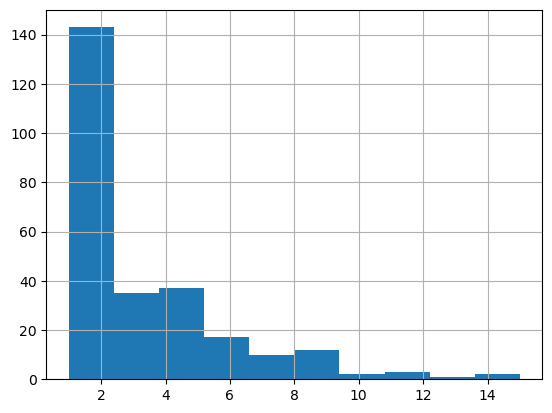

In [22]:
master_three_way_trades_df['count'].hist()

In [23]:
master_three_way_trades_df['count'].mean(), master_three_way_trades_df['count'].median()

(3.1717557251908395, 2.0)

#### HOARDING - TASK 2

In [24]:
filename = 'B6_barterGame.json'

In [25]:
trades_df = game_trades_df_dict[filename]
player_names_list = list(set(player_profession_dict[filename].keys()))
trades_df = get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename)
# print(trades_df.columns)

# if ('requestedInventory' not in trades_df.columns) or ('requestedInventory' not in trades_df.columns):
#     print('no requestedInventory/requesterInventory')
#     continue

# for player in player_names_list:
player = 'SajNinja' #'SepticSteak'
player_profession = player_profession_dict[filename][player]
player_useful_items = profession_items_dict[player_profession]
x_df = trades_df[(trades_df['requester']==player) | (trades_df['requested']==player)]

row1 = x_df.iloc[0, :]
p1 = row1['requester']
p2 = row1['requested']
if p1 == player:
    # first trade as requester, check requesterInventory
    player_inventory1 = row1['requesterInventory']
else:
    # first trade as requested, check requestedInventory
    player_inventory1 = row1['requestedInventory']

row2 = x_df.iloc[-1,:]
p1 = row2['requester']
p2 = row2['requested']
if p1 == player:
    # first trade as requester, check requesterInventory
    player_inventory2 = row2['requesterInventory']
else:
    # first trade as requested, check requestedInventory
    player_inventory2 = row2['requestedInventory']

player_start_inventory_dict = {}
for ent in player_inventory1:
    if ent['resource'] not in player_start_inventory_dict:
        player_start_inventory_dict[ent['resource'].lower().replace(' ', '_')] = 0
    player_start_inventory_dict[ent['resource'].lower().replace(' ', '_')] += ent['amount']

player_end_inventory_dict = {}
for ent in player_inventory2:
    if ent['resource'] not in player_end_inventory_dict:
        player_end_inventory_dict[ent['resource'].lower().replace(' ', '_')] = 0
    player_end_inventory_dict[ent['resource'].lower().replace(' ', '_')] += ent['amount']

total_items_list = list(set(player_start_inventory_dict.keys()) | set(player_end_inventory_dict.keys()))
total_items_list = [item.lower().replace(' ', '_') for item in total_items_list]
nonuseful_items_list = [item for item in total_items_list if item not in player_useful_items]
nonuseful_items_list = [item for item in nonuseful_items_list if (
    item in itemTierValue_dict or item in tier1_items_list or item in tier2_items_list or item in tier3_items_list)]
print('nonuseful_items = ', nonuseful_items_list)


nonuseful_items =  ['lead']


In [26]:
x_df

,requester,offer,request,requested,beginTimestamp,endScores,requestID,beginScores,endTimestamp,hasMenu,status,requestedInventory,requesterInventory,trade_value,game_name,game_type,requester_nonuseful,requested_nonuseful
4,SajNinja,"[{'amount': 1, 'resource': 'Cod'}, {'amount': ...","[{'amount': 1, 'resource': 'Iron Ingot'}]",BeepyBoi,2023-08-31 23:18:31.249,"{'requester': 19, 'requested': 62}",SajNinjaBeepyBoi1693523911249,"{'requester': 18, 'requested': 59}",2023-08-31 23:18:53.283,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",4,B6,Baseline,[],[]
7,RafshanRehan,"[{'amount': 1, 'resource': 'Diamond Sword'}]","[{'amount': 6, 'resource': 'Glass'}]",SajNinja,2023-08-31 23:21:01.147,"{'requester': 28, 'requested': 29}",RafshanRehanSajNinja1693524061147,"{'requester': 22, 'requested': 19}",2023-08-31 23:21:10.948,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",16,B6,Baseline,[],[]
10,SajNinja,"[{'amount': 3, 'resource': 'Leather'}]","[{'amount': 2, 'resource': 'Coal'}, {'amount':...",FeelsBadCat,2023-08-31 23:22:42.367,"{'requester': 33, 'requested': 71}",SajNinjaFeelsBadCat1693524162367,"{'requester': 29, 'requested': 68}",2023-08-31 23:23:12.501,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",7,B6,Baseline,[],[]
14,SajNinja,"[{'amount': 6, 'resource': 'Leather'}]","[{'amount': 6, 'resource': 'Coal'}]",FeelsBadCat,2023-08-31 23:24:25.499,"{'requester': 39, 'requested': 77}",SajNinjaFeelsBadCat1693524265499,"{'requester': 33, 'requested': 71}",2023-08-31 23:24:42.898,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",12,B6,Baseline,[],[]
17,SSCCPP,"[{'amount': 5, 'resource': 'Smithing Table'}]","[{'amount': 4, 'resource': 'Sheep Spawn Egg'},...",SajNinja,2023-08-31 23:26:17.610,"{'requester': 77, 'requested': 54}",SSCCPPSajNinja1693524377610,"{'requester': 62, 'requested': 39}",2023-08-31 23:26:27.673,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 0, 'resource': 'Air'}, {'amount': ...",30,B6,Baseline,[],[]
20,BeepyBoi,"[{'amount': 1, 'resource': 'Gold Ingot'}, {'am...","[{'amount': 1, 'resource': 'Tropical Fish'}, {...",SajNinja,2023-08-31 23:27:02.324,"{'requester': 77, 'requested': 59}",BeepyBoiSajNinja1693524422324,"{'requester': 73, 'requested': 54}",2023-08-31 23:27:20.319,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",9,B6,Baseline,[],[]
22,SQUEAKERLOO999,"[{'amount': 2, 'resource': 'Iron Ingot'}]","[{'amount': 2, 'resource': 'Cooked Beef'}]",SajNinja,2023-08-31 23:27:57.946,"{'requester': 21, 'requested': 61}",SQUEAKERLOO999SajNinja1693524477946,"{'requester': 15, 'requested': 59}",2023-08-31 23:28:07.446,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",8,B6,Baseline,[],[]
27,RafshanRehan,"[{'amount': 1, 'resource': 'Gold Ingot'}]","[{'amount': 1, 'resource': 'Leather'}]",SajNinja,2023-08-31 23:29:47.946,"{'requester': 34, 'requested': 62}",RafshanRehanSajNinja1693524587946,"{'requester': 34, 'requested': 61}",2023-08-31 23:30:02.348,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",2,B6,Baseline,[leather],[]
34,RafshanRehan,"[{'amount': 5, 'resource': 'Iron Ingot'}]","[{'amount': 1, 'resource': 'Stone Pickaxe'}]",SajNinja,2023-08-31 23:31:31.346,"{'requester': 44, 'requested': 105}",RafshanRehanSajNinja1693524691346,"{'requester': 34, 'requested': 62}",2023-08-31 23:36:47.566,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",15,B6,Baseline,[],[]
35,SajNinja,"[{'amount': 1, 'resource': 'Leather'}, {'amoun...","[{'amount': 1, 'resource': 'Diamond Swo

In [27]:
for ind, row in x_df.iterrows():
    print(row['requester'], row['request'])
    print(row['requested'], row['offer'])
    print('########')

SajNinja [{'amount': 1, 'resource': 'Iron Ingot'}]
BeepyBoi [{'amount': 1, 'resource': 'Cod'}, {'amount': 1, 'resource': 'Salmon'}, {'amount': 1, 'resource': 'Tropical Fish'}]
########
RafshanRehan [{'amount': 6, 'resource': 'Glass'}]
SajNinja [{'amount': 1, 'resource': 'Diamond Sword'}]
########
SajNinja [{'amount': 2, 'resource': 'Coal'}, {'amount': 2, 'resource': 'Iron Ingot'}]
FeelsBadCat [{'amount': 3, 'resource': 'Leather'}]
########
SajNinja [{'amount': 6, 'resource': 'Coal'}]
FeelsBadCat [{'amount': 6, 'resource': 'Leather'}]
########
SSCCPP [{'amount': 4, 'resource': 'Sheep Spawn Egg'}, {'amount': 1, 'resource': 'Loom'}]
SajNinja [{'amount': 5, 'resource': 'Smithing Table'}]
########
BeepyBoi [{'amount': 1, 'resource': 'Tropical Fish'}, {'amount': 1, 'resource': 'Tropical Fish'}, {'amount': 1, 'resource': 'Tropical Fish'}, {'amount': 1, 'resource': 'Tropical Fish'}]
SajNinja [{'amount': 1, 'resource': 'Gold Ingot'}, {'amount': 1, 'resource': 'Smithing Table'}, {'amount': 1, 'r

In [28]:
num_trades, nonuseful_items_list

NameError: name 'num_trades' is not defined

In [29]:
num_trades = 0
for ind, row in x_df.iterrows():
    p1 = row['requester']
    p2 = row['requested']
    if p1 == player:
        # first trade as requester, check requesterInventory
        player_nonuseful = row['requester_nonuseful']
        player_inventory = row['requesterInventory']
    if p2 == player:
        # first trade as requester, check requesterInventory
        player_nonuseful = row['requested_nonuseful']
        player_inventory = row['requestedInventory']
    if player_nonuseful != []:
        # some nonuseful item in trade
        hoarding_list = [item for item in player_nonuseful if item in nonuseful_items_list]
        if hoarding_list != []:
            # hoarding exists, add this trade into count
            num_trades += 1

    player_inventory_dict = {}
    for ent in player_inventory:
        if ent['resource'] not in player_inventory_dict:
            player_inventory_dict[ent['resource'].lower().replace(' ', '_')] = 0
        player_inventory_dict[ent['resource'].lower().replace(' ', '_')] += ent['amount']
    print(player_inventory_dict)
#     print(player_nonuseful)
    print('###########')


{'written_book': 1, 'air': 0, 'iron_ingot': 8, 'gold_ingot': 7, 'coal': 3}
###########
{'written_book': 1, 'air': 0, 'iron_ingot': 8, 'gold_ingot': 7, 'coal': 3}
###########
{'written_book': 1, 'air': 0, 'iron_ingot': 10, 'gold_ingot': 7, 'coal': 9}
###########
{'written_book': 1, 'air': 0, 'iron_ingot': 10, 'gold_ingot': 7, 'coal': 10}
###########
{'written_book': 1, 'air': 0, 'smithing_table': 6, 'iron_ingot': 10, 'gold_ingot': 7, 'coal': 10}
###########
{'written_book': 1, 'air': 0, 'iron_ingot': 10, 'gold_ingot': 9, 'coal': 10}
###########
{'written_book': 1, 'air': 0, 'iron_ingot': 11, 'gold_ingot': 9, 'coal': 10}
###########
{'written_book': 1, 'air': 0, 'iron_ingot': 11, 'gold_ingot': 19, 'coal': 10}
###########
{'written_book': 1, 'air': 0, 'coal': 14}
###########
{'written_book': 1, 'air': 0, 'iron_ingot': 11, 'gold_ingot': 19, 'coal': 10}
###########
{'written_book': 1, 'air': 0, 'iron_ingot': 11, 'coal': 12}
###########
{'written_book': 1, 'air': 0, 'coal': 12}
###########
{

In [30]:
nonuseful_items_list, player_end_inventory_dict, player_start_inventory_dict

(['lead'],
 {'written_book': 1,
  'diamond_sword': 1,
  'smithing_table': 10,
  'fletching_table': 2,
  'lead': 8,
  'air': 0,
  'iron_ingot': 19,
  'gold_ingot': 20,
  'coal': 18},
 {'written_book': 1, 'air': 0, 'iron_ingot': 8, 'gold_ingot': 7, 'coal': 3})

In [31]:
x_df

,requester,offer,request,requested,beginTimestamp,endScores,requestID,beginScores,endTimestamp,hasMenu,status,requestedInventory,requesterInventory,trade_value,game_name,game_type,requester_nonuseful,requested_nonuseful
4,SajNinja,"[{'amount': 1, 'resource': 'Cod'}, {'amount': ...","[{'amount': 1, 'resource': 'Iron Ingot'}]",BeepyBoi,2023-08-31 23:18:31.249,"{'requester': 19, 'requested': 62}",SajNinjaBeepyBoi1693523911249,"{'requester': 18, 'requested': 59}",2023-08-31 23:18:53.283,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",4,B6,Baseline,[],[]
7,RafshanRehan,"[{'amount': 1, 'resource': 'Diamond Sword'}]","[{'amount': 6, 'resource': 'Glass'}]",SajNinja,2023-08-31 23:21:01.147,"{'requester': 28, 'requested': 29}",RafshanRehanSajNinja1693524061147,"{'requester': 22, 'requested': 19}",2023-08-31 23:21:10.948,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",16,B6,Baseline,[],[]
10,SajNinja,"[{'amount': 3, 'resource': 'Leather'}]","[{'amount': 2, 'resource': 'Coal'}, {'amount':...",FeelsBadCat,2023-08-31 23:22:42.367,"{'requester': 33, 'requested': 71}",SajNinjaFeelsBadCat1693524162367,"{'requester': 29, 'requested': 68}",2023-08-31 23:23:12.501,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",7,B6,Baseline,[],[]
14,SajNinja,"[{'amount': 6, 'resource': 'Leather'}]","[{'amount': 6, 'resource': 'Coal'}]",FeelsBadCat,2023-08-31 23:24:25.499,"{'requester': 39, 'requested': 77}",SajNinjaFeelsBadCat1693524265499,"{'requester': 33, 'requested': 71}",2023-08-31 23:24:42.898,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",12,B6,Baseline,[],[]
17,SSCCPP,"[{'amount': 5, 'resource': 'Smithing Table'}]","[{'amount': 4, 'resource': 'Sheep Spawn Egg'},...",SajNinja,2023-08-31 23:26:17.610,"{'requester': 77, 'requested': 54}",SSCCPPSajNinja1693524377610,"{'requester': 62, 'requested': 39}",2023-08-31 23:26:27.673,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 0, 'resource': 'Air'}, {'amount': ...",30,B6,Baseline,[],[]
20,BeepyBoi,"[{'amount': 1, 'resource': 'Gold Ingot'}, {'am...","[{'amount': 1, 'resource': 'Tropical Fish'}, {...",SajNinja,2023-08-31 23:27:02.324,"{'requester': 77, 'requested': 59}",BeepyBoiSajNinja1693524422324,"{'requester': 73, 'requested': 54}",2023-08-31 23:27:20.319,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",9,B6,Baseline,[],[]
22,SQUEAKERLOO999,"[{'amount': 2, 'resource': 'Iron Ingot'}]","[{'amount': 2, 'resource': 'Cooked Beef'}]",SajNinja,2023-08-31 23:27:57.946,"{'requester': 21, 'requested': 61}",SQUEAKERLOO999SajNinja1693524477946,"{'requester': 15, 'requested': 59}",2023-08-31 23:28:07.446,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",8,B6,Baseline,[],[]
27,RafshanRehan,"[{'amount': 1, 'resource': 'Gold Ingot'}]","[{'amount': 1, 'resource': 'Leather'}]",SajNinja,2023-08-31 23:29:47.946,"{'requester': 34, 'requested': 62}",RafshanRehanSajNinja1693524587946,"{'requester': 34, 'requested': 61}",2023-08-31 23:30:02.348,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",2,B6,Baseline,[leather],[]
34,RafshanRehan,"[{'amount': 5, 'resource': 'Iron Ingot'}]","[{'amount': 1, 'resource': 'Stone Pickaxe'}]",SajNinja,2023-08-31 23:31:31.346,"{'requester': 44, 'requested': 105}",RafshanRehanSajNinja1693524691346,"{'requester': 34, 'requested': 62}",2023-08-31 23:36:47.566,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",15,B6,Baseline,[],[]
35,SajNinja,"[{'amount': 1, 'resource': 'Leather'}, {'amoun...","[{'amount': 1, 'resource': 'Diamond Swo

In [32]:
hoarded_items_dict = {}

for filename in game_trades_df_dict:
    print(filename)
    hoarded_items_dict[filename] = []
    # three_way_trades_dict[filename] = []
    trades_df = game_trades_df_dict[filename]
    player_names_list = list(set(player_profession_dict[filename].keys()))
    trades_df = get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename)
    # print(trades_df.columns)

    if ('requestedInventory' not in trades_df.columns) or ('requestedInventory' not in trades_df.columns):
        print('no requestedInventory/requesterInventory')
        continue
        
    for player in player_names_list:
        player_profession = player_profession_dict[filename][player]
        player_useful_items = profession_items_dict[player_profession]
        x_df = trades_df[(trades_df['requester']==player) | (trades_df['requested']==player)]
        row1 = x_df.iloc[0, :]
        p1 = row1['requester']
        p2 = row1['requested']
        if p1 == player:
            # first trade as requester, check requesterInventory
            player_inventory1 = row1['requesterInventory']
        else:
            # first trade as requested, check requestedInventory
            player_inventory1 = row1['requestedInventory']
        
        row2 = x_df.iloc[-1,:]
        p1 = row2['requester']
        p2 = row2['requested']
        if p1 == player:
            # first trade as requester, check requesterInventory
            player_inventory2 = row2['requesterInventory']
        else:
            # first trade as requested, check requestedInventory
            player_inventory2 = row2['requestedInventory']

        player_start_inventory_dict = {}
        for ent in player_inventory1:
            if ent['resource'] not in player_start_inventory_dict:
                player_start_inventory_dict[ent['resource'].lower().replace(' ', '_')] = 0
            player_start_inventory_dict[ent['resource'].lower().replace(' ', '_')] += ent['amount']

        player_end_inventory_dict = {}
        for ent in player_inventory2:
            if ent['resource'] not in player_end_inventory_dict:
                player_end_inventory_dict[ent['resource'].lower().replace(' ', '_')] = 0
            player_end_inventory_dict[ent['resource'].lower().replace(' ', '_')] += ent['amount']

        total_items_list = list(set(player_start_inventory_dict.keys()) | set(player_end_inventory_dict.keys()))
        total_items_list = [item.lower().replace(' ', '_') for item in total_items_list]
        nonuseful_items_list = [item for item in total_items_list if item not in player_useful_items]
        nonuseful_items_list = [item for item in nonuseful_items_list if (
            item in itemTierValue_dict or item in tier1_items_list or item in tier2_items_list or item in tier3_items_list)]
        print('nonuseful_items = ', nonuseful_items_list)

#         num_trades = 0
#         for ind, row in x_df.iterrows():
#             p1 = row['requester']
#             p2 = row['requested']
#             if p1 == player:
#                 # first trade as requester, check requesterInventory
#                 player_nonuseful = row['requester_nonuseful']
#             if p2 == player:
#                 # first trade as requester, check requesterInventory
#                 player_nonuseful = row['requested_nonuseful']
#             if player_nonuseful != []:
#                 # some nonuseful item in trade
#                 hoarding_list = [item for item in player_nonuseful if item in nonuseful_items_list]
#                 if hoarding_list != []:
#                     # hoarding exists, add this trade into count
#                     num_trades += 1

        hoarded_items_list = []
        hoarded_score = 0
        for item in nonuseful_items_list:
            dct = {}
            # print(item in 
            if item in player_end_inventory_dict:
                print(item, ' end ', player_end_inventory_dict[item])
                if item not in dct:
                    dct = {item: 0}
                dct[item] += player_end_inventory_dict[item]
                if item in player_start_inventory_dict:
                    dct[item] -= player_start_inventory_dict[item]
                    print(item, ' start ', player_start_inventory_dict[item])    
                if dct[item] > 0:
                    if item in itemTierValue_dict:
                        hoarded_score += (dct[item]*itemTierValue_dict[item]['value'])
                    else:
                        # use exp.xlsx
                        if item in tier1_items_list:
                            hoarded_score += (dct[item] * TIER1_VALUE)
                        elif item in tier2_items_list:
                            hoarded_score += (dct[item] * TIER2_VALUE)
                        elif item in tier3_items_list:
                            hoarded_score += (dct[item] * TIER3_VALUE)
                        else:
                            # unable to find this item in the tier value directory
                            print('unable to find tier value for item: ', item)
                if dct[item] > 0:
                    hoarded_items_list.append(dct)
        num_trades = 0
        hoarded_score_2 = 0
        ls = [list(ent.keys())[0] for ent in hoarded_items_list]
        hoarded_items_list_2 = {}
        for ind, row in x_df.iterrows():
            p1 = row['requester']
            p2 = row['requested']
            if p1 == player:
                # first trade as requester, check requesterInventory
                player_nonuseful = row['requester_nonuseful']
                player_receiving_items_dict = {ent['resource'].lower().replace(' ', '_'): ent['amount'] for ent in row['request']}
                player_receiving_items_list = [ent['resource'].lower().replace(' ', '_') for ent in row['request']]
                print(ind, player_nonuseful, player_receiving_items_dict)
            if p2 == player:
                # first trade as requester, check requesterInventory
                player_nonuseful = row['requested_nonuseful']
                player_receiving_items_dict = {ent['resource'].lower().replace(' ', '_'): ent['amount'] for ent in row['offer']}
                player_receiving_items_list = [ent['resource'].lower().replace(' ', '_') for ent in row['offer']]
                print(ind, player_nonuseful, player_receiving_items_dict)
            if player_nonuseful != []:
                # some nonuseful item in trade
                hoarding_list = [item for item in player_nonuseful if item in ls]
                if hoarding_list != []:
                    # hoarding exists, add this trade into count
                    print('hoarding_list: ', hoarding_list)
                    if set(player_nonuseful) == set(player_receiving_items_list):
                        num_trades += 1
                        print('num_trades = ', num_trades)
                        for item in player_receiving_items_dict:
                            if item not in hoarded_items_list_2:
                                hoarded_items_list_2[item] = 0                                
                            if item in itemTierValue_dict:
                                hoarded_score_2 += (player_receiving_items_dict[item]*itemTierValue_dict[item]['value'])
                                hoarded_items_list_2[item] += player_receiving_items_dict[item]
                            else:
                                # use exp.xlsx
                                if item in tier1_items_list:
                                    hoarded_score_2 += (player_receiving_items_dict[item] * TIER1_VALUE)
                                    hoarded_items_list_2[item] += player_receiving_items_dict[item]
                                elif item in tier2_items_list:
                                    hoarded_score_2 += (player_receiving_items_dict[item] * TIER2_VALUE)
                                    hoarded_items_list_2[item] += player_receiving_items_dict[item]
                                elif item in tier3_items_list:
                                    hoarded_score_2 += (dct[item] * TIER3_VALUE)
                                    hoarded_items_list_2[item] += player_receiving_items_dict[item]
                                else:
                                    # unable to find this item in the tier value directory
                                    print('unable to find tier value for item: ', item)
        if hoarded_score_2 < hoarded_score:
            hoarded_score = hoarded_score_2
            hoarded_items_list = hoarded_items_list_2

        if hoarded_score != 0:
            hoarded_items_dict[filename].append(
                {'player': player, 'items_list': hoarded_items_list, 'hoarded_score': hoarded_score,
                 'num_trades': num_trades, 'game_type': row1['game_type'],  'game_name': row1['game_name']})
        
#         hoarded_items_list = []
#         hoarded_score = 0
#         for item in nonuseful_items_list:
#             dct = {}
#             # print(item in 
#             if item in player_end_inventory_dict:
#                 print(item, ' end ', player_end_inventory_dict[item])
#                 if item not in dct:
#                     dct = {item: 0}
#                 dct[item] += player_end_inventory_dict[item]
#                 if item in player_start_inventory_dict:
#                     dct[item] -= player_start_inventory_dict[item]
#                     print(item, ' start ', player_start_inventory_dict[item])    
#                 if dct[item] > 0:
#                     if item in itemTierValue_dict:
#                         hoarded_score += (dct[item]*itemTierValue_dict[item]['value'])
#                     else:
#                         # use exp.xlsx
#                         if item in tier1_items_list:
#                             hoarded_score += (dct[item] * TIER1_VALUE)
#                         elif item in tier2_items_list:
#                             hoarded_score += (dct[item] * TIER2_VALUE)
#                         elif item in tier3_items_list:
#                             hoarded_score += (dct[item] * TIER3_VALUE)
#                         else:
#                             # unable to find this item in the tier value directory
#                             print('unable to find tier value for item: ', item)
#                 if dct[item] > 0:
#                     hoarded_items_list.append(dct)
#         if hoarded_score != 0:
#             hoarded_items_dict[filename].append(
#                 {'player': player, 'items_list': hoarded_items_list, 'hoarded_score': hoarded_score,
#                  'num_trades': num_trades, 'game_type': row1['game_type'],  'game_name': row1['game_name']})


A1_barterGame.json
no requestedInventory/requesterInventory
A2_barterGame.json
no requestedInventory/requesterInventory
A3_barterGame.json
no requestedInventory/requesterInventory
A4_barterGame.json
no requestedInventory/requesterInventory
A5_barterGame.json
nonuseful_items =  ['glass']
glass  end  1
1 [] {'potato': 7, 'carrot': 4, 'bread': 1}
4 [] {'wheat': 1}
8 [] {'bread': 9}
9 [] {'wheat': 18}
13 [] {'pumpkin': 1}
18 ['tropical_fish', 'pufferfish'] {'tropical_fish': 5, 'pufferfish': 1}
23 [] {'carrot': 1, 'mushroom_stew': 1}
24 [] {'pumpkin': 9}
27 ['glass', 'stone', 'quartz_block'] {'glass': 3, 'stone': 1, 'quartz_block': 2}
hoarding_list:  ['glass']
num_trades =  1
28 [] {'wheat': 1, 'potato': 1, 'mushroom_stew': 1}
35 [] {'potato': 2}
37 ['quartz_block'] {'quartz_block': 1}
38 ['red_glazed_terracotta'] {'red_glazed_terracotta': 2}
39 ['glass'] {'glass': 1}
hoarding_list:  ['glass']
num_trades =  2
40 ['glass'] {'glass': 1}
hoarding_list:  ['glass']
num_trades =  3
42 ['iron_ingo

nonuseful_items =  ['quartz_block', 'birch_log', 'oak_log']
quartz_block  end  1
birch_log  end  1
birch_log  start  1
oak_log  end  1
oak_log  start  1
24 [] {'cow_spawn_egg': 3}
32 [] {'leather': 2, 'rabbit_hide': 2}
44 [] {'cow_spawn_egg': 1}
49 [] {'rabbit_hide': 1}
56 [] {'rabbit_hide': 4}
61 [] {'lead': 9}
77 [] {'cow_spawn_egg': 6}
80 [] {'rabbit_hide': 2}
86 [] {'leather': 2}
104 [] {'saddle': 1}
110 [] {'lead': 8}
nonuseful_items =  ['quartz_block']
quartz_block  end  19
quartz_block  start  19
24 [] {'smithing_table': 3}
28 [] {'diamond_sword': 1}
31 [] {'diamond_sword': 1}
32 [] {'smithing_table': 2}
48 [] {'iron_ingot': 2}
60 [] {'smithing_table': 1}
64 [] {'iron_ingot': 13}
68 [] {'gold_ingot': 9}
76 [] {'iron_ingot': 1}
87 [] {'coal': 16}
105 [] {'fletching_table': 2}
108 [] {'coal': 1}
109 ['leather'] {'leather': 4}
nonuseful_items =  ['diamond_sword', 'saddle', 'fletching_table', 'sheep_spawn_egg', 'white_wool', 'leather', 'loom', 'string', 'blue_glazed_terracotta', 'st

In [43]:
hoarded_items_dict = {}

for filename in game_trades_df_dict:
    print(filename)
    hoarded_items_dict[filename] = []
    # three_way_trades_dict[filename] = []
    trades_df = game_trades_df_dict[filename]
    player_names_list = list(set(player_profession_dict[filename].keys()))
    trades_df = get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename)
    # print(trades_df.columns)

    if ('requestedInventory' not in trades_df.columns) or ('requestedInventory' not in trades_df.columns):
        print('no requestedInventory/requesterInventory')
        continue
        
    for player in player_names_list:
        player_profession = player_profession_dict[filename][player]
        player_useful_items = profession_items_dict[player_profession]
        x_df = trades_df[(trades_df['requester']==player) | (trades_df['requested']==player)]
        print(player, player_useful_items)
        row1 = x_df.iloc[0, :]
        p1 = row1['requester']
        p2 = row1['requested']
        if p1 == player:
            # first trade as requester, check requesterInventory
            player_inventory1 = row1['requesterInventory']
        else:
            # first trade as requested, check requestedInventory
            player_inventory1 = row1['requestedInventory']
        
        row2 = x_df.iloc[-1,:]
        p1 = row2['requester']
        p2 = row2['requested']
        if p1 == player:
            # first trade as requester, check requesterInventory
            player_inventory2 = row2['requesterInventory']
        else:
            # first trade as requested, check requestedInventory
            player_inventory2 = row2['requestedInventory']

        player_start_inventory_dict = {}
        for ent in player_inventory1:
            if ent['resource'] not in player_start_inventory_dict:
                player_start_inventory_dict[ent['resource'].lower().replace(' ', '_')] = 0
            player_start_inventory_dict[ent['resource'].lower().replace(' ', '_')] += ent['amount']

        player_end_inventory_dict = {}
        for ent in player_inventory2:
            if ent['resource'] not in player_end_inventory_dict:
                player_end_inventory_dict[ent['resource'].lower().replace(' ', '_')] = 0
            player_end_inventory_dict[ent['resource'].lower().replace(' ', '_')] += ent['amount']

        total_items_list = list(set(player_start_inventory_dict.keys()) | set(player_end_inventory_dict.keys()))
        total_items_list = [item.lower().replace(' ', '_') for item in total_items_list]
        nonuseful_items_list = [item for item in total_items_list if item not in player_useful_items]
        nonuseful_items_list = [item for item in nonuseful_items_list if (
            item in itemTierValue_dict or item in tier1_items_list or item in tier2_items_list or item in tier3_items_list)]
        print('nonuseful_items = ', nonuseful_items_list)
#         player_hoarded_items_dict = {item: 0 for item in nonuseful_items_list}
#         print(player_hoarded_items_dict)

        num_trades = 0
        for ind, row in x_df.iterrows():
            p1 = row['requester']
            p2 = row['requested']
            if p1 == player:
                # first trade as requester, check requesterInventory
                player_nonuseful = row['requester_nonuseful']
                player_receiving_items_dict = {ent['resource'].lower().replace(' ', '_'): ent['amount'] for ent in row['request']}
                player_receiving_items_list = [ent['resource'].lower().replace(' ', '_') for ent in row['request']]
                print(ind, player_nonuseful, player_receiving_items_dict)
            if p2 == player:
                # first trade as requester, check requesterInventory
                player_nonuseful = row['requested_nonuseful']
                player_receiving_items_dict = {ent['resource'].lower().replace(' ', '_'): ent['amount'] for ent in row['offer']}
                player_receiving_items_list = [ent['resource'].lower().replace(' ', '_') for ent in row['offer']]
                print(ind, player_nonuseful, player_receiving_items_dict)
            if player_nonuseful != []:
                # some nonuseful item in trade
                hoarding_list = [item for item in player_nonuseful if item in nonuseful_items_list]
                if hoarding_list != []:
                    # hoarding exists, add this trade into count
                    print('hoarding_list: ', hoarding_list)
                    if set(player_nonuseful) == set(player_receiving_items_list):
                        # hoarding exists as only nonuseful items are received by player
                        num_trades += 1
#                         for item in hoarding_list:
#                             player_hoarded_items_dict[item] += player_receiving_items_dict[item]

        
        hoarded_items_list = []
        hoarded_score = 0
#         for item in player_hoarded_items_dict:
#             if item in itemTierValue_dict:
#                 hoarded_score += (player_hoarded_items_dict[item]*itemTierValue_dict[item]['value'])
#             else:
#                 # use exp.xlsx
#                 if item in tier1_items_list:
#                     hoarded_score += (player_hoarded_items_dict[item] * TIER1_VALUE)
#                 elif item in tier2_items_list:
#                     hoarded_score += (player_hoarded_items_dict[item] * TIER2_VALUE)
#                 elif item in tier3_items_list:
#                     hoarded_score += (player_hoarded_items_dict[item] * TIER3_VALUE)
#                 else:
#                     # unable to find this item in the tier value directory
#                     print('unable to find tier value for item: ', item)
#             if player_hoarded_items_dict[item] > 0:
#                 hoarded_items_list.append({item: player_hoarded_items_dict[item]})
        dct = {}
        # print(item in 
        if item in player_end_inventory_dict:
            print(item, ' end ', player_end_inventory_dict[item])
            if item not in dct:
                dct = {item: 0}
            dct[item] += player_end_inventory_dict[item]
            if item in player_start_inventory_dict:
                dct[item] -= player_start_inventory_dict[item]
                print(item, ' start ', player_start_inventory_dict[item])    
            if dct[item] > 0:
                if item in itemTierValue_dict:
                    hoarded_score += (dct[item]*itemTierValue_dict[item]['value'])
                else:
                    # use exp.xlsx
                    if item in tier1_items_list:
                        hoarded_score += (dct[item] * TIER1_VALUE)
                    elif item in tier2_items_list:
                        hoarded_score += (dct[item] * TIER2_VALUE)
                    elif item in tier3_items_list:
                        hoarded_score += (dct[item] * TIER3_VALUE)
                    else:
                        # unable to find this item in the tier value directory
                        print('unable to find tier value for item: ', item)
            if dct[item] > 0:
                hoarded_items_list.append(dct)
        if hoarded_score != 0:
            hoarded_items_dict[filename].append(
                {'player': player, 'items_list': hoarded_items_list, 'hoarded_score': hoarded_score,
                 'num_trades': num_trades, 'game_type': row1['game_type'],  'game_name': row1['game_name']})


A1_barterGame.json
no requestedInventory/requesterInventory
A2_barterGame.json
no requestedInventory/requesterInventory
A3_barterGame.json
no requestedInventory/requesterInventory
A4_barterGame.json
no requestedInventory/requesterInventory
A5_barterGame.json
Dallachaos ['cod', 'salmon', 'tropical_fish', 'pufferfish', 'turtle_egg', 'oak_boat']
nonuseful_items =  ['stone', 'cow_spawn_egg']
4 [] {'pufferfish': 1}
7 [] {'oak_boat': 1}
10 ['mushroom_stew', 'lead'] {'turtle_egg': 4, 'pufferfish': 1, 'mushroom_stew': 1, 'lead': 5}
12 ['glass', 'stone'] {'glass': 7, 'stone': 4}
hoarding_list:  ['stone']
14 ['potato', 'fletching_table', 'cow_spawn_egg', 'carrot'] {'potato': 2, 'fletching_table': 2, 'cow_spawn_egg': 4, 'carrot': 1, 'tropical_fish': 2, 'salmon': 9}
hoarding_list:  ['cow_spawn_egg']
20 ['rabbit_hide', 'leather', 'stone'] {'rabbit_hide': 1, 'leather': 1, 'stone': 2}
hoarding_list:  ['stone']
22 [] {'pufferfish': 3}
24 [] {'tropical_fish': 4, 'pufferfish': 1}
26 [] {'salmon': 10, 'c

thebigzucch ['leather', 'stick', 'lead', 'cow_spawn_egg', 'rabbit_hide', 'saddle']
nonuseful_items =  ['wheat']
8 ['gold_ingot'] {'gold_ingot': 1}
12 [] {'saddle': 1}
17 [] {'stick': 2}
21 [] {'lead': 1, 'leather': 15, 'cow_spawn_egg': 9}
25 [] {'stick': 16}
37 [] {'leather': 5}
41 [] {'cow_spawn_egg': 1, 'rabbit_hide': 1, 'lead': 2}
45 ['oak_planks', 'spruce_planks'] {'oak_planks': 1, 'spruce_planks': 1}
63 [] {'stick': 1}
65 [] {'lead': 4}
83 [] {'lead': 3}
86 [] {'lead': 4}
87 ['written_book'] {'written_book': 1}
99 [] {'stick': 2}
101 ['written_book'] {'written_book': 1, 'rabbit_hide': 1}
105 [] {'stick': 1}
carmennphamm ['beef', 'chicken', 'porkchop', 'cooked_beef', 'cooked_porkchop', 'rabbit_stew']
nonuseful_items =  ['potato', 'glass', 'birch_log']
5 [] {'chicken': 8, 'beef': 2, 'rabbit_stew': 1}
13 [] {'porkchop': 2, 'beef': 2}
21 [] {'porkchop': 6, 'beef': 16, 'chicken': 1, 'cooked_beef': 1}
25 ['glass'] {'glass': 1}
hoarding_list:  ['glass']
29 [] {'chicken': 9}
36 [] {'cooke

In [44]:
# nonuseful_items_list, item_name

In [33]:
hoarded_items_dict

{'A1_barterGame.json': [],
 'A2_barterGame.json': [],
 'A3_barterGame.json': [],
 'A4_barterGame.json': [],
 'A5_barterGame.json': [{'player': 'Ethan2098',
   'items_list': [{'glass': 1}],
   'hoarded_score': 1,
   'num_trades': 6,
   'game_type': 'Competitive',
   'game_name': 'A5'},
  {'player': 'Dallachaos',
   'items_list': [{'stone': 1}],
   'hoarded_score': 1,
   'num_trades': 3,
   'game_type': 'Competitive',
   'game_name': 'A5'}],
 'A6_barterGame.json': [{'player': 'chehukyu',
   'items_list': [{'diamond_sword': 1},
    {'smithing_table': 1},
    {'blue_dye': 9},
    {'string': 1}],
   'hoarded_score': 23,
   'num_trades': 3,
   'game_type': 'Competitive',
   'game_name': 'A6'},
  {'player': 'DENISOVICH704',
   'items_list': {'cooked_beef': 2, 'spruce_planks': 5},
   'hoarded_score': 21,
   'num_trades': 2,
   'game_type': 'Competitive',
   'game_name': 'A6'},
  {'player': 'labrat2368',
   'items_list': {'gold_ingot': 2},
   'hoarded_score': 2,
   'num_trades': 1,
   'game_typ

In [34]:
hoarded_items_df_dict = {filename: df.from_records(hoarded_items_dict[filename]) for filename in hoarded_items_dict if hoarded_items_dict[filename] != []}
hoarded_items_df_dict.keys()

dict_keys(['A5_barterGame.json', 'A6_barterGame.json', 'B6_barterGame.json', 'C5_barterGame.json', 'C7_barterGame.txt'])

In [35]:
master_hoarded_items_df = df(columns=hoarded_items_df_dict[filename].columns)
print(master_hoarded_items_df.shape)
for filename in hoarded_items_df_dict:
    master_hoarded_items_df = pd.concat([master_hoarded_items_df, hoarded_items_df_dict[filename]])
    print(filename, hoarded_items_df_dict[filename].shape, master_hoarded_items_df.shape)    
master_hoarded_items_df

(0, 6)
A5_barterGame.json (2, 6) (2, 6)
A6_barterGame.json (6, 6) (8, 6)
B6_barterGame.json (3, 6) (11, 6)
C5_barterGame.json (1, 6) (12, 6)
C7_barterGame.txt (2, 6) (14, 6)


,player,items_list,hoarded_score,num_trades,game_type,game_name
0,Ethan2098,[{'glass': 1}],1,6,Competitive,A5
1,Dallachaos,[{'stone': 1}],1,3,Competitive,A5
0,chehukyu,"[{'diamond_sword': 1}, {'smithing_table': 1}, ...",23,3,Competitive,A6
1,DENISOVICH704,"{'cooked_beef': 2, 'spruce_planks': 5}",21,2,Competitive,A6
2,labrat2368,{'gold_ingot': 2},2,1,Competitive,A6
3,Stargirl344,"{'smithing_table': 1, 'cooked_porkchop': 2, 'c...",24,2,Competitive,A6
4,TDAbos5,"{'iron_ingot': 6, 'leather': 8}",14,4,Competitive,A6
5,hollyarden03,"{'chicken': 3, 'diamond_sword': 1, 'coal': 5, ...",21,5,Competitive,A6
0,FeelsBadCat,"{'fletching_table': 8, 'quartz_block': 8, 'rab...",62,4,Baseline,B6
1,BeepyBoi,"[{'stone': 16}, {'coal': 2}, {'iron_ingot': 1}...",27,8,Baseline,B6


In [36]:
master_hoarded_items_df.to_excel('Humans-Hoarding-Items-df_updated_subset.xlsx')

In [51]:
filename, player, hoarded_score, total_items_list, nonuseful_items_list

('C7_barterGame.txt',
 'OrganicSugar',
 0,
 ['blue_glazed_terracotta',
  'sheep_spawn_egg',
  'written_book',
  'stone_pickaxe',
  'quartz_block',
  'string',
  'red_glazed_terracotta',
  'glass',
  'air'],
 ['sheep_spawn_egg', 'written_book', 'string', 'air'])

In [47]:
x_df

,requester,offer,request,requested,beginTimestamp,endScores,requestID,beginScores,endTimestamp,hasMenu,status,requestedInventory,requesterInventory,trade_value,game_name,game_type,requester_nonuseful,requested_nonuseful
13,firestar5467,"[{'amount': 1, 'resource': 'Iron Ingot'}, {'am...","[{'amount': 1, 'resource': 'Mushroom Stew'}]",OrganicSugar,2023-09-04 21:25:28.788,"{'requester': 60, 'requested': 7}",firestar5467OrganicSugar1693862728788,"{'requester': 50, 'requested': 7}",2023-09-04 21:25:36.814,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 0, 'resource': 'Air'}, {'amount': ...",15,C7,Cooperative,[],"[iron_ingot, coal]"
18,Archangel6266,"[{'amount': 19, 'resource': 'Glass'}]","[{'amount': 5, 'resource': 'Birch Log'}, {'amo...",OrganicSugar,2023-09-04 21:27:24.084,"{'requester': 116, 'requested': 26}",Archangel6266OrganicSugar1693862844084,"{'requester': 111, 'requested': 7}",2023-09-04 21:27:44.238,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",32,C7,Cooperative,"[pumpkin, gold_ingot]",[]
20,Protocol0,"[{'amount': 1, 'resource': 'Red Glazed Terraco...","[{'amount': 1, 'resource': 'Loom'}]",OrganicSugar,2023-09-04 21:28:25.822,"{'requester': 64, 'requested': 29}",Protocol0OrganicSugar1693862905822,"{'requester': 64, 'requested': 26}",2023-09-04 21:28:36.591,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",6,C7,Cooperative,[loom],[]
23,Protocol0,"[{'amount': 2, 'resource': 'Quartz Block'}, {'...","[{'amount': 1, 'resource': 'Gold Ingot'}, {'am...",OrganicSugar,2023-09-04 21:30:05.372,"{'requester': 73, 'requested': 32}",Protocol0OrganicSugar1693863005372,"{'requester': 70, 'requested': 29}",2023-09-04 21:30:28.936,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",6,C7,Cooperative,[],[]
26,firestar5467,"[{'amount': 4, 'resource': 'Red Glazed Terraco...","[{'amount': 4, 'resource': 'Bread'}, {'amount'...",OrganicSugar,2023-09-04 21:32:44.186,"{'requester': 113, 'requested': 44}",firestar5467OrganicSugar1693863164186,"{'requester': 100, 'requested': 32}",2023-09-04 21:32:53.717,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Mushroom Stew'}, {...",25,C7,Cooperative,[],[]
30,Archangel6266,"[{'amount': 3, 'resource': 'Red Glazed Terraco...","[{'amount': 1, 'resource': 'Oak Planks'}, {'am...",OrganicSugar,2023-09-04 21:33:09.046,"{'requester': 144, 'requested': 53}",Archangel6266OrganicSugar1693863189046,"{'requester': 137, 'requested': 44}",2023-09-04 21:33:22.903,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",16,C7,Cooperative,[],[]
41,OrganicSugar,"[{'amount': 3, 'resource': 'Gold Ingot'}, {'am...","[{'amount': 4, 'resource': 'Blue Glazed Terrac...",firestar5467,2023-09-04 21:36:47.733,"{'requester': 65, 'requested': 132}",OrganicSugarfirestar54671693863407733,"{'requester': 53, 'requested': 132}",2023-09-04 21:37:07.065,True,ACCEPTED,"[{'amount': 0, 'resource': 'Air'}, {'amount': ...","[{'amount': 1, 'resource': 'Written Book'}, {'...",19,C7,Cooperative,[],"[gold_ingot, iron_ingot]"
42,OrganicSugar,"[{'amount': 2, 'resource': 'Sheep Spawn Egg'}]","[{'amount': 1, 'resource': 'Quartz Block'}]",AndrewLukkuz,2023-09-04 21:37:19.070,"{'requester': 66, 'requested': 119}",OrganicSugarAndrewLukkuz1693863439070,"{'requester': 65, 'requested': 113}",2023-09-04 21:37:28.538,True,ACCEPTED,"[{'amount': 1, 'resource': 'Written Book'}, {'...","[{'amount': 1, 'resource': 'Written Book'}, {'...",7,C7,Cooperative,[],[]
48,OrganicSugar,"[{'amount': 4, 'resource': 'String'}]","[{'amount': 1, 'resource': 'Blue Glazed Terrac...",AndrewLukkuz,2023-09-04 21:39:25.496,"{'requester': 69, 'requested': 123}",OrganicSugarAndrewLukkuz1693863565496,"{'requester': 66, 'requested': 119}",2023-09-04 21:39:3

In [50]:
player_start_inventory_dict, player_end_inventory_dict

({'written_book': 1,
  'air': 0,
  'quartz_block': 3,
  'string': 4,
  'red_glazed_terracotta': 3,
  'sheep_spawn_egg': 2},
 {'written_book': 1,
  'blue_glazed_terracotta': 10,
  'stone_pickaxe': 1,
  'quartz_block': 20,
  'red_glazed_terracotta': 10,
  'glass': 15})

In [20]:
ACCEPTED = 'ACCEPTED'
DECLINED = 'DECLINED'
CANCELLED = 'CANCELLED'

game_trades_df_dict = {}
game_final_df_dict = {}
game_list = []
gametype_list = []
winner_list = []
score_list = []

player_profession_dict = {}

for filename in json_files:
    print(filename)
    gamename = filename.split('_barterGame')[0]
    data=open(os.path.join(localdir,folder,filename), encoding='utf8')
    data_load=json.load(data)
    data_load=data_load['barterGames'][0]

    player_profession_dict[filename] = {}
    for ent in data_load['participants']:
        player_profession_dict[filename][ent['name']] = ent['profession'] 

    trades_df=df.from_records(data_load["trades"])
    for ind in trades_df.index:
        trades_df.loc[ind,"beginTimestamp"]=pd.Timestamp(trades_df.loc[ind,"beginTimestamp"])
        trades_df.loc[ind,"endTimestamp"]=pd.Timestamp(trades_df.loc[ind,"endTimestamp"])
    print(trades_df.shape, filename)
    # trades_df = trades_df[trades_df['status'].isin([ACCEPTED, CANCELLED, DECLINED])]
#     trades_df = trades_df[trades_df['status']==ACCEPTED]

    print(trades_df.shape, filename)
    game_trades_df_dict[filename] = trades_df
    # final_df=df.from_records(data_load['participants'])
    # game_final_df_dict[filename] = final_df
    # winner_list.append(data_load['winner'])
    # game_list.append(filename.split('_')[1])
    # if 'A' in filename.split('_')[1]:
    #     gametype_list.append('Competitive')
    # elif 'B' in filename.split('_')[1]:
    #     gametype_list.append('Baseline')
    # else:
    #     gametype_list.append('Cooperative')
    # score_list.append(data_load['score'])

# winner_df = df({'game':game_list, 'gametype':gametype_list, 'winner':winner_list,'score':score_list})
professions_set = set([player_profession_dict[folder][player] for folder in player_profession_dict for player in player_profession_dict[folder]])

A1_barterGame.json
(102, 9) A1_barterGame.json
(102, 9) A1_barterGame.json
A2_barterGame.json
(63, 11) A2_barterGame.json
(63, 11) A2_barterGame.json
A3_barterGame.json
(118, 11) A3_barterGame.json
(118, 11) A3_barterGame.json
A4_barterGame.json
(65, 11) A4_barterGame.json
(65, 11) A4_barterGame.json
A5_barterGame.json
(53, 13) A5_barterGame.json
(53, 13) A5_barterGame.json
A6_barterGame.json
(89, 13) A6_barterGame.json
(89, 13) A6_barterGame.json
A7_barterGame.txt
(54, 13) A7_barterGame.txt
(54, 13) A7_barterGame.txt
B1_barterGame.json
(66, 9) B1_barterGame.json
(66, 9) B1_barterGame.json
B2_barterGame.json
(88, 11) B2_barterGame.json
(88, 11) B2_barterGame.json
B3_barterGame.json
(71, 11) B3_barterGame.json
(71, 11) B3_barterGame.json
B4_barterGame.json
(46, 11) B4_barterGame.json
(46, 11) B4_barterGame.json
B5_barterGame.json
(113, 13) B5_barterGame.json
(113, 13) B5_barterGame.json
B6_barterGame.json
(99, 13) B6_barterGame.json
(99, 13) B6_barterGame.json
C1_barterGame.json
(42, 11

In [21]:
for filename in game_trades_df_dict:
    print(filename)
    trades_df = game_trades_df_dict[filename]
    trades_df = trades_df.apply(get_trade_value, axis=1)
    game_trades_df_dict[filename] = trades_df

A1_barterGame.json
A2_barterGame.json
A3_barterGame.json
unable to find tier value:  written_book
unable to find tier value:  written_book
unable to find tier value:  written_book
unable to find tier value:  written_book
unable to find tier value:  written_book
unable to find tier value:  written_book
unable to find tier value:  written_book
unable to find tier value:  written_book
unable to find tier value:  written_book
A4_barterGame.json
A5_barterGame.json
A6_barterGame.json
unable to find tier value:  crafting_table
unable to find tier value:  written_book
unable to find tier value:  written_book
A7_barterGame.txt
B1_barterGame.json
unable to find tier value:  carrots
B2_barterGame.json
B3_barterGame.json
B4_barterGame.json
B5_barterGame.json
B6_barterGame.json
C1_barterGame.json
unable to find tier value:  emerald
unable to find tier value:  emerald
unable to find tier value:  emerald
unable to find tier value:  emerald
C2_barterGame.json
C3_barterGame.json
C4_barterGame.json
unab

In [32]:
trades_df = game_trades_df_dict['A1_barterGame.json']

x_df = trades_df[(trades_df['requester']=='labmember009') | (trades_df['requested']=='labmember009')]
x_df['status'].value_counts()


CANCELLED    7
ACCEPTED     6
DECLINED     5
Name: status, dtype: int64

In [ ]:
nonaccepted_trades_dict = {}

for filename in game_trades_df_dict:
    print(filename)
    nonaccepted_trades_dict[filename] = []
    trades_df = game_trades_df_dict[filename]
    player_names_list = list(set(player_profession_dict[filename].keys()))
    trades_df = get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename)

    for player in player_names_list:
        player_profession = player_profession_dict[filename][player]
        player_useful_items = profession_items_dict[player_profession]
        x_df = trades_df[(trades_df['requester']==player) | (trades_df['requested']==player)]
        num_nonaccept = 0
        num_nonaccept_relevant = 0
        nonaccept_relevant_value = 0
        for ind, row in x_df.iterrows():
            if row['status'] == 'DECLINED' and row['requested'] == player:
                num_nonaccept += 1
                if row['offer']
                
        
    for player in player_names_list:
        x_df = trades_df[(trades_df['requester']==player) | (trades_df['requested']==player)]

        for i in range(len(x_df.index)-1):
            N = len(x_df.index)
            row = x_df.loc[x_df.index[i], :]
            p1 = row['requester']
            p2 = row['requested']
            if p1 == player:
                # check requester_nonuseful
                p1_non_useful = row['requester_nonuseful']
                # p2_non_useful = row['requested_nonuseful']
                if len(p1_non_useful):
                    # p1 got non-useful items
                    # when does he trade these items, if at all, after how many trades
                    for j in np.arange(1, N-i):
                        row_n1 = x_df.loc[x_df.index[i+j], :]
                        if row_n1['requester'] == player:
                            # check offer items
                            items_n1 = [ent['resource'] for ent in row_n1['offer']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in offer, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                three_way_trades_dict[filename].append(
                                    {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                     'non_useful_items1': p1_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                     'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                     'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
                        elif row_n1['requested'] == player:
                            # check request items
                            items_n1 = [ent['resource'] for ent in row_n1['request']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in request, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                three_way_trades_dict[filename].append(
                                    {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                     'non_useful_items1': p1_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                     'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                     'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
                    
            if p2 == player:
                # check requested_nonuseful
                # p1_non_useful = row['requester_nonuseful']
                p2_non_useful = row['requested_nonuseful']
                if len(p2_non_useful):
                    # p2 got non-useful items
                    # when does he trade these items, if at all, after how many trades
                    for j in np.arange(1, N-i):
                        row_n1 = x_df.loc[x_df.index[i+j], :]
                        if row_n1['requester'] == player:
                            # check offer items
                            items_n1 = [ent['resource'] for ent in row_n1['offer']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in offer, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                three_way_trades_dict[filename].append(
                                    {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                     'non_useful_items1': p2_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                     'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                     'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
                        elif row_n1['requested'] == player:
                            # check request items
                            items_n1 = [ent['resource'] for ent in row_n1['request']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in request, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                three_way_trades_dict[filename].append(
                                    {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                     'non_useful_items1': p2_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                     'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                     'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
